# Image Filtering: Spatial Methods

In [1]:
%load_ext cython

In [2]:
%matplotlib inline

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage import exposure
from skimage import filters as flt
from skimage.util import img_as_float32 as img_as_float

from scipy.ndimage import convolve

In [3]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print('Data range:', np.min(I), 'to', np.max(I))

In [4]:
def show_images(I, titles=None):
    fig, ax = plt.subplots(1, len(I), figsize=(12,12))
    
    for i in np.arange(0,len(I)):
        ax[i].imshow(I[i], cmap='gray')
        ax[i].set_axis_off()
        if titles != None:
            ax[i].set_title(titles[i])

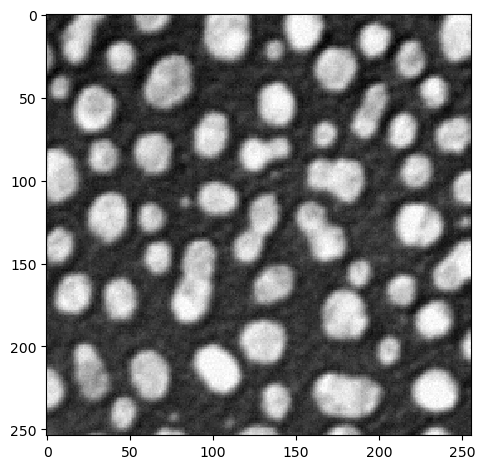

In [5]:
I1 = io.imread("../../images/blobs.png", as_gray=True)
I1 = img_as_float(I1)

io.imshow(I1)

## Edge Detection: Marr-Hildreth (Poor-Man's Version)

In [6]:
%%cython 

import numpy as np

cpdef marr_hildreth(I):
    Iz = np.zeros_like(I, dtype=np.float32)
    
    cdef int u, v
    cdef int N, E, S, W
    cdef int NE, SE, SW, NW 
    for u in np.arange(1,I.shape[0]-1):
        for v in np.arange(1,I.shape[1]-1):
            N = np.sign(I[u-1][v])
            E = np.sign(I[u][v+1])
            S = np.sign(I[u+1][v])
            W = np.sign(I[u][v-1])
            NE = np.sign(I[u-1][v+1])
            SE = np.sign(I[u+1][v+1])
            SW = np.sign(I[u+1][v-1])
            NW = np.sign(I[u-1][v-1])
        
            if N*S == -1 or W*E == -1 or NW*SE == -1 or SW*NE == -1:
                Iz[u][v] = 1.0
    return Iz

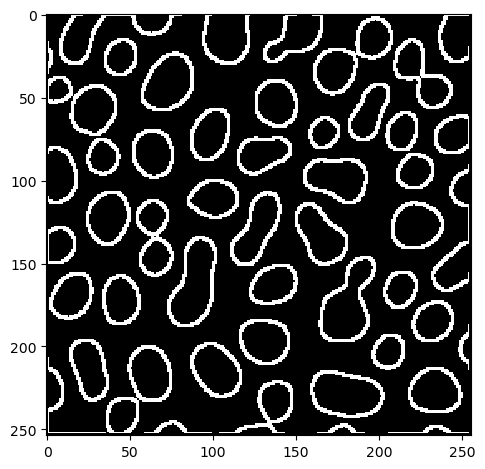

In [10]:
sigma = 7
I2 = flt.gaussian(I1, sigma=sigma, truncate=3)
I3 = flt.laplace(I2)
Iz = marr_hildreth(I3)

io.imshow(Iz)